In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("mental_health.csv")

In [5]:
df.head()

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0


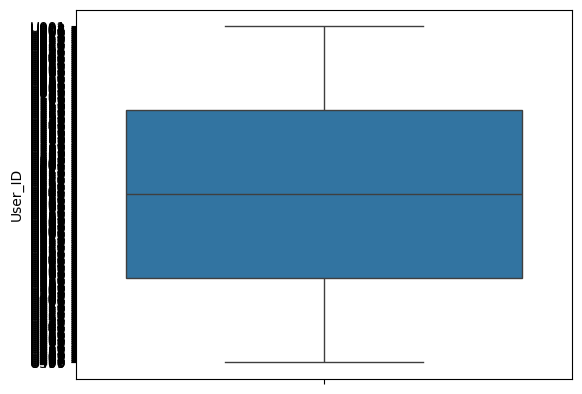

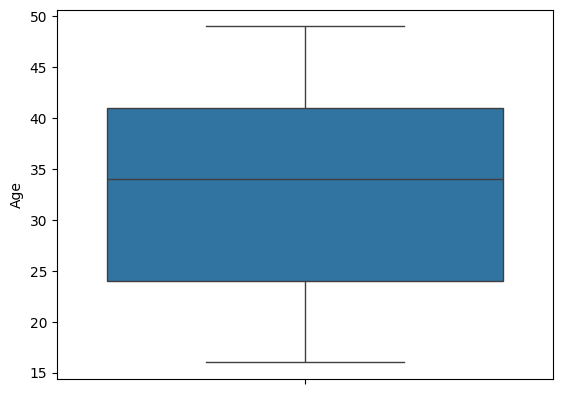

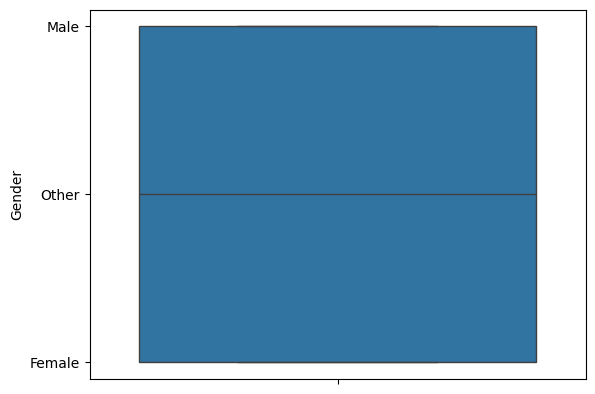

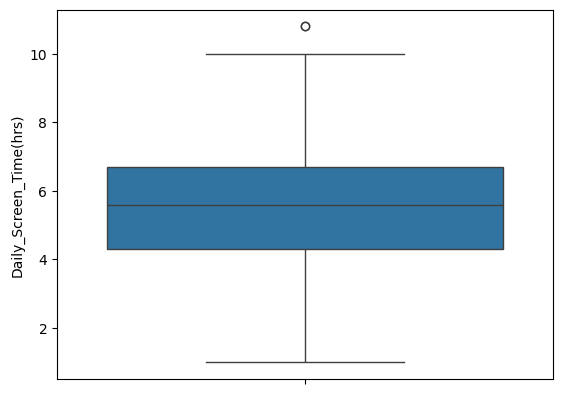

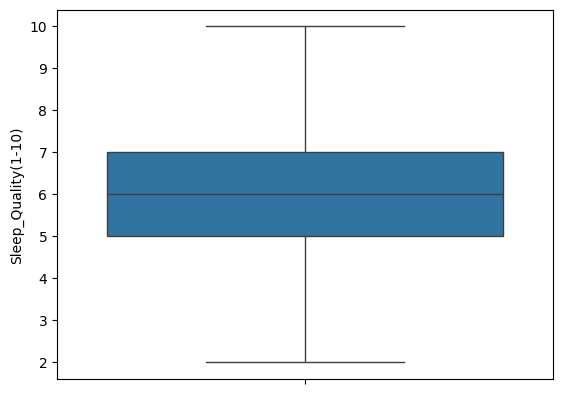

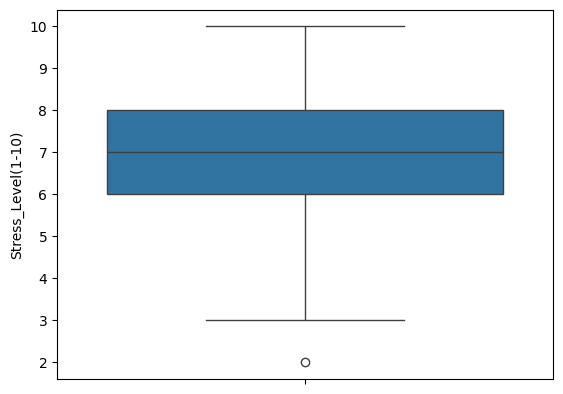

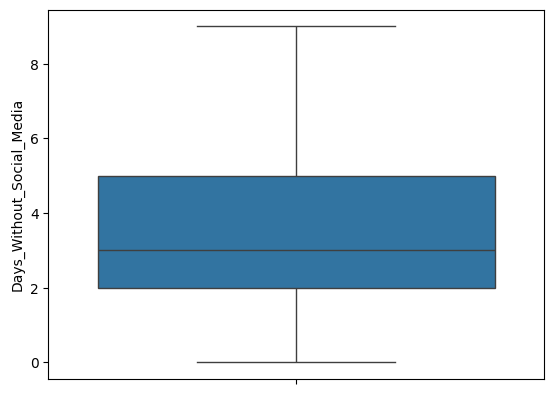

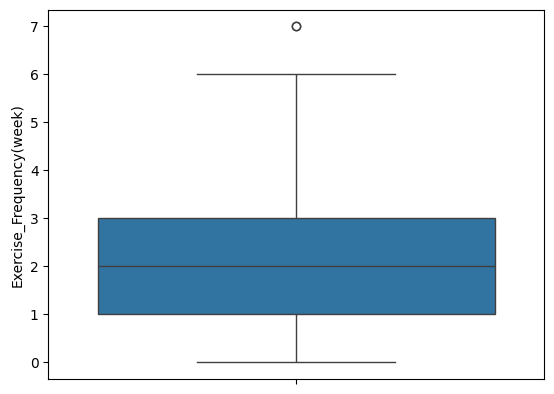

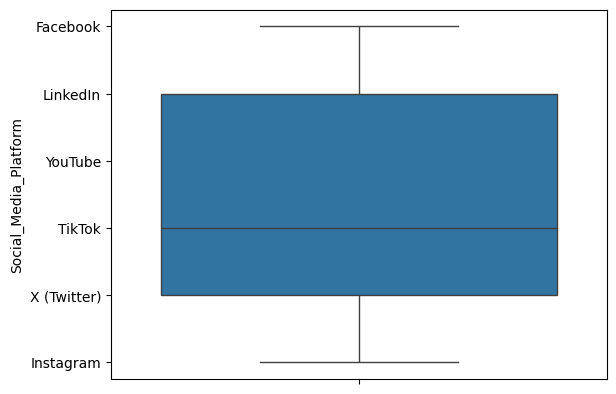

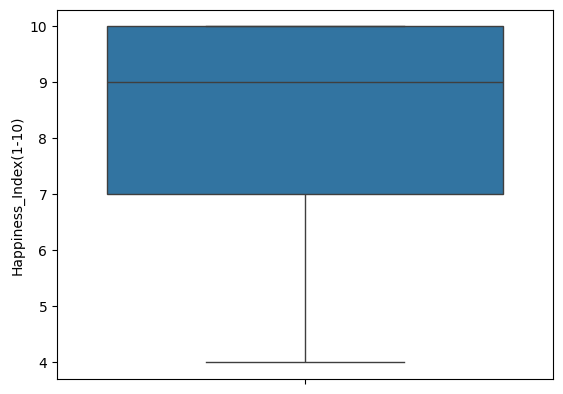

In [6]:
for col in df.columns:    
    plt.Figure(figsize=(3 , 4))
    sns.boxplot(df[col])
    plt.show()

In [7]:

df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [8]:
df.describe().columns

Index(['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
       'Stress_Level(1-10)', 'Days_Without_Social_Media',
       'Exercise_Frequency(week)', 'Happiness_Index(1-10)'],
      dtype='object')

NOW , WE CHECK HOW MUCH TIME IS BEING SPENT ON EACH SOCIAL MEDIA PLATFORM.

<Axes: xlabel='Daily_Screen_Time(hrs)', ylabel='Social_Media_Platform'>

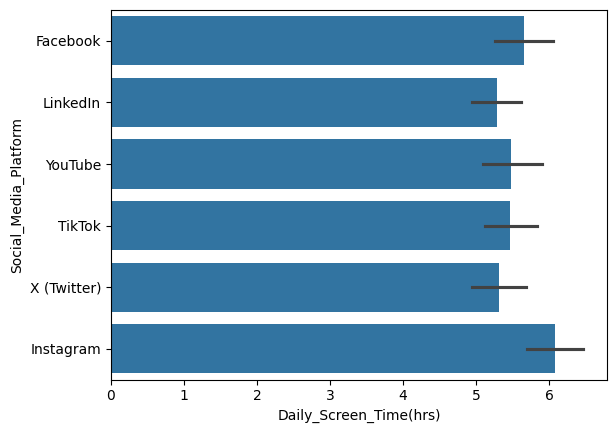

In [9]:
sns.barplot(x = df["Daily_Screen_Time(hrs)"] , y = df["Social_Media_Platform"])

Instagram and Facebook are the most used platforms.

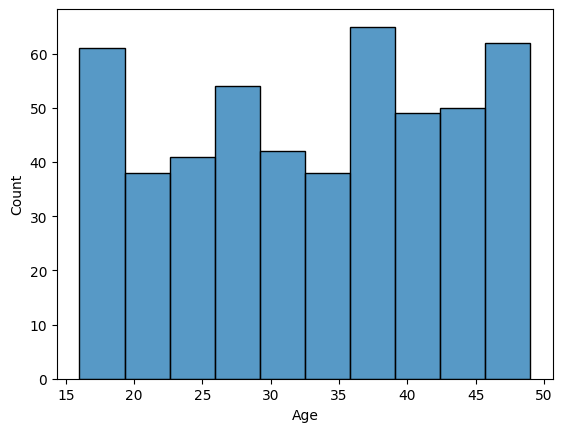

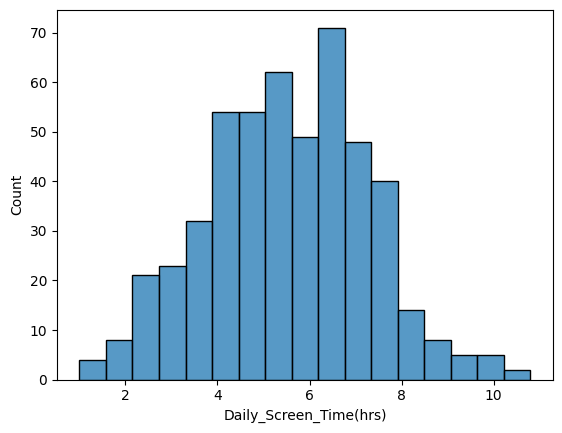

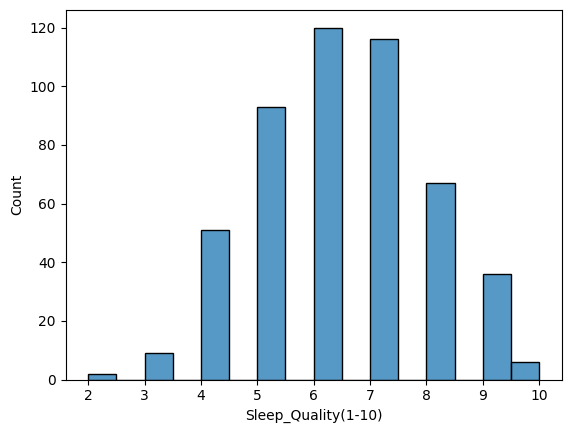

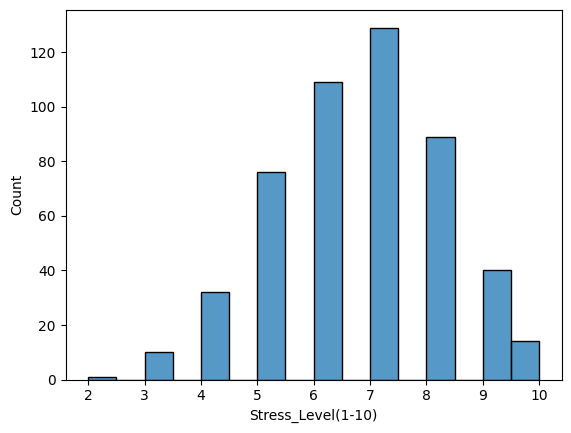

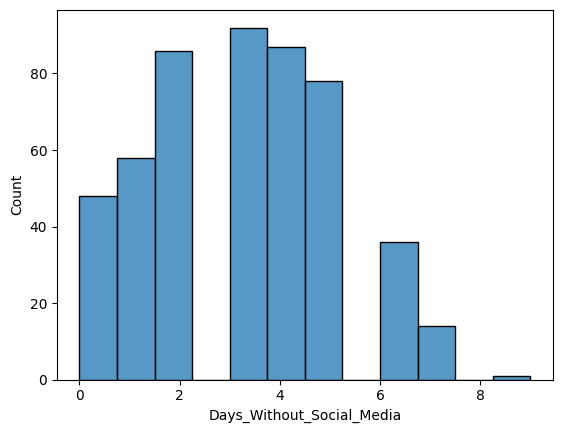

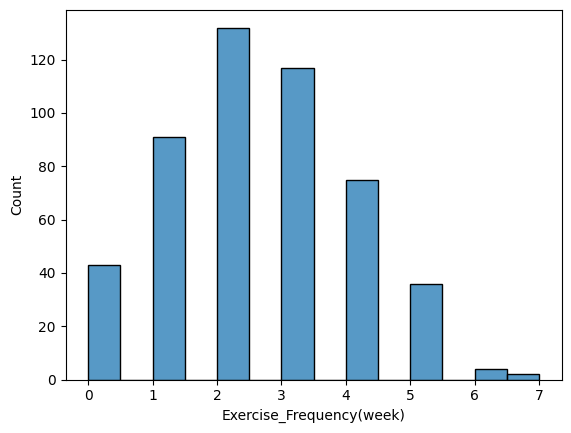

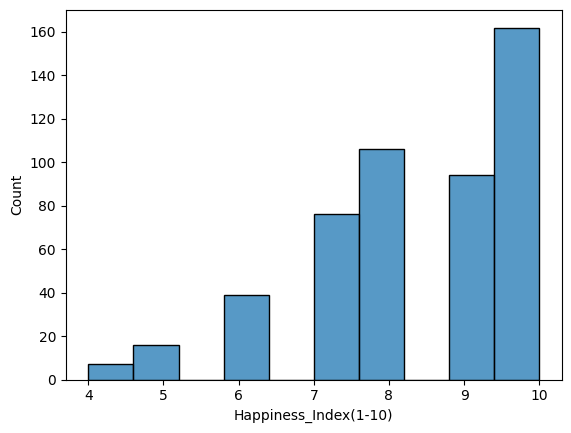

In [10]:
for col in ['Age', 'Daily_Screen_Time(hrs)', 'Sleep_Quality(1-10)',
       'Stress_Level(1-10)', 'Days_Without_Social_Media',
       'Exercise_Frequency(week)', 'Happiness_Index(1-10)']:
    sns.histplot(df[col])
    plt.show()

<Axes: ylabel='Gender'>

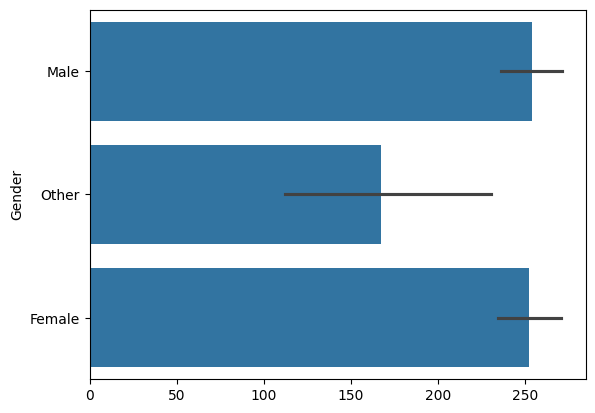

In [11]:
sns.barplot(df["Gender"])

<Axes: ylabel='Social_Media_Platform'>

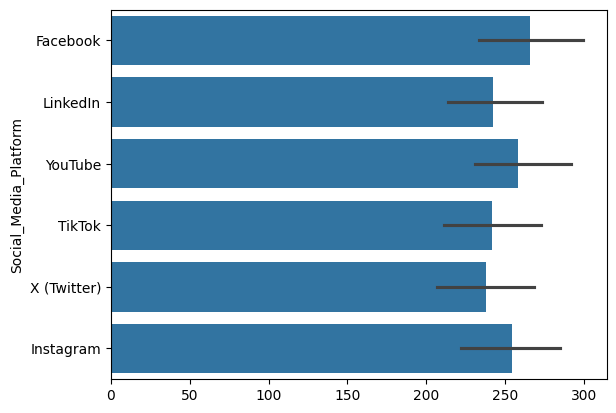

In [12]:
sns.barplot(df["Social_Media_Platform"])

Here , we performed univariate analysis and these are the following observations : 
1. Most continuous variables have no missing values and are non-skewed except some variables like stress level or exercise frequency where models can develop a bias.
2. Categorical values have an almost equal distribution of data

BIVARIATE ANALYSIS

In [13]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Daily_Screen_Time(hrs)',
       'Sleep_Quality(1-10)', 'Stress_Level(1-10)',
       'Days_Without_Social_Media', 'Exercise_Frequency(week)',
       'Social_Media_Platform', 'Happiness_Index(1-10)'],
      dtype='object')

<Axes: xlabel='Sleep_Quality(1-10)', ylabel='Daily_Screen_Time(hrs)'>

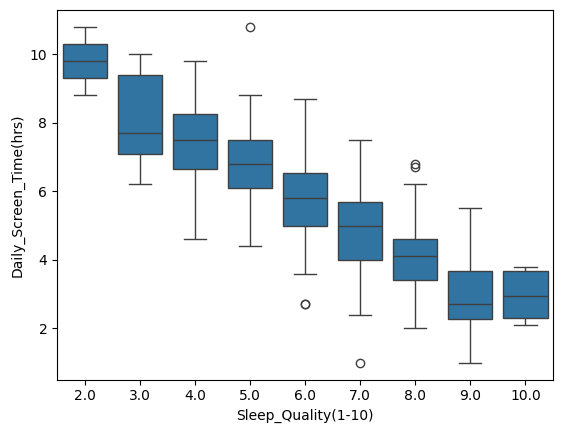

In [14]:
sns.boxplot(x = df["Sleep_Quality(1-10)"] , y = df["Daily_Screen_Time(hrs)"] )

<Axes: xlabel='Stress_Level(1-10)', ylabel='Sleep_Quality(1-10)'>

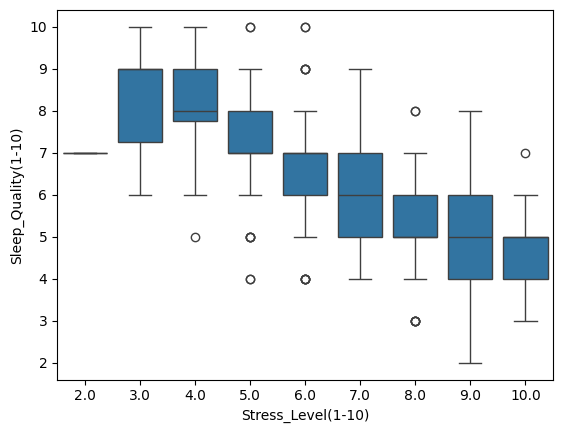

In [15]:
sns.boxplot(y= df["Sleep_Quality(1-10)"] , x = df["Stress_Level(1-10)"])

Box plots are very useful in plotting discrete random variables

<Axes: xlabel='Stress_Level(1-10)', ylabel='Daily_Screen_Time(hrs)'>

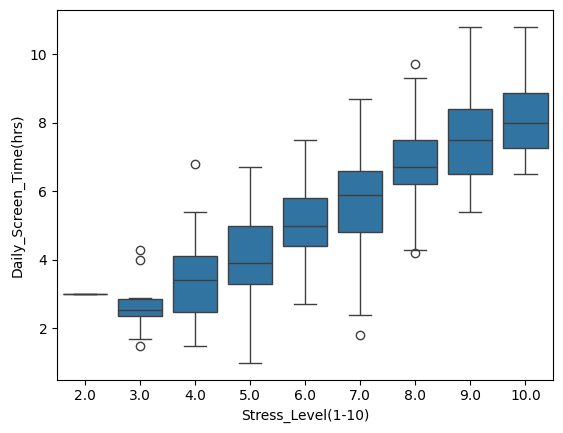

In [16]:
sns.boxplot(y = df["Daily_Screen_Time(hrs)"] , x = df["Stress_Level(1-10)"])

<Axes: >

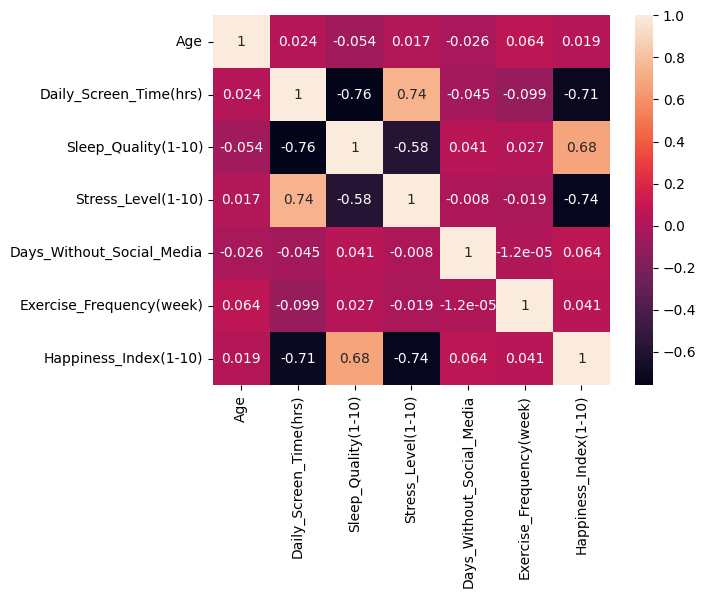

In [17]:
hmap_df = df.drop(["User_ID" , "Gender" , "Social_Media_Platform"] , axis=1)
sns.heatmap(data=hmap_df.corr() ,annot=True)

Bivariate / Correlation Analysis

The correlation matrix highlights strong interrelationships among the variables Stress Level, Daily Screen Time, Sleep Quality, and Happiness Index.
A clear behavioral pattern emerges:

As Stress Level increases, Daily Screen Time tends to rise, while both Sleep Quality and Happiness Index decline.

Sleep Quality shows a strong negative correlation with Stress Level and Daily Screen Time, suggesting that higher stress and prolonged screen exposure are associated with poorer sleep.

Happiness Index is also negatively correlated with both Stress Level and Screen Time, implying that individuals with higher stress and screen usage generally report lower happiness.

Overall, these trends suggest that stress, digital habits, and sleep quality are closely intertwined, and together they significantly influence one’s overall sense of happiness and well-being.

<Axes: xlabel='Gender', ylabel='Sleep_Quality(1-10)'>

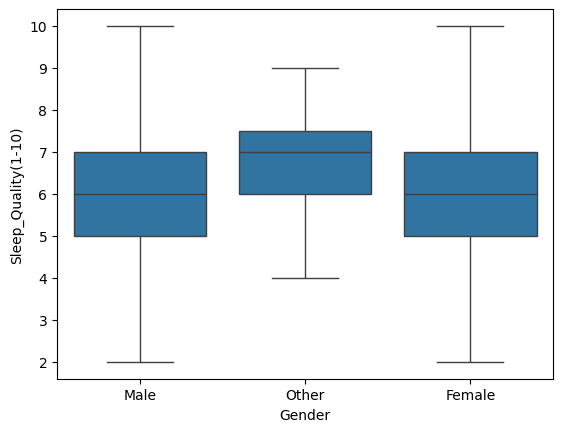

In [18]:
sns.boxplot(x = df["Gender"] , y=df["Sleep_Quality(1-10)"])

“Males and females have comparable median sleep quality (~6), though males show greater variability. Individuals identifying as ‘Other’ report slightly higher and more consistent sleep quality.”

Its clear , we have four very important features here , those are:
1. Daily Screen Time
2. Stress Level
3. Exercise Frequency
4. Happiness Index
These four features co-relate to each other highly , and help in telling a story

In [29]:
df[df["Age"].notnull()]

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10)
0,U001,44,Male,3.1,7.0,6.0,2.0,5.0,Facebook,10.0
1,U002,30,Other,5.1,7.0,8.0,5.0,3.0,LinkedIn,10.0
2,U003,23,Other,7.4,6.0,7.0,1.0,3.0,YouTube,6.0
3,U004,36,Female,5.7,7.0,8.0,1.0,1.0,TikTok,8.0
4,U005,34,Female,7.0,4.0,7.0,5.0,1.0,X (Twitter),8.0
...,...,...,...,...,...,...,...,...,...,...
495,U496,23,Male,6.9,5.0,7.0,4.0,2.0,X (Twitter),10.0
496,U497,43,Female,5.6,7.0,6.0,5.0,2.0,Facebook,9.0
497,U498,41,Male,7.7,5.0,7.0,2.0,2.0,LinkedIn,8.0
498,U499,23,Male,4.2,9.0,7.0,0.0,2.0,Facebook,9.0


In [30]:
def GroupAge(x):
    if x < 18:
        return "Teenager"
    elif 18 <= x < 30:
        return "Adult"
    elif 30 <= x < 45:
        return "Middle-Aged"
    else:
        return "Old"
df["GroupAge"] = df["Age"].apply(GroupAge)

In [32]:
df["GroupAge"].value_counts()

GroupAge
Middle-Aged    232
Adult          160
Old             74
Teenager        34
Name: count, dtype: int64

<Axes: xlabel='GroupAge', ylabel='count'>

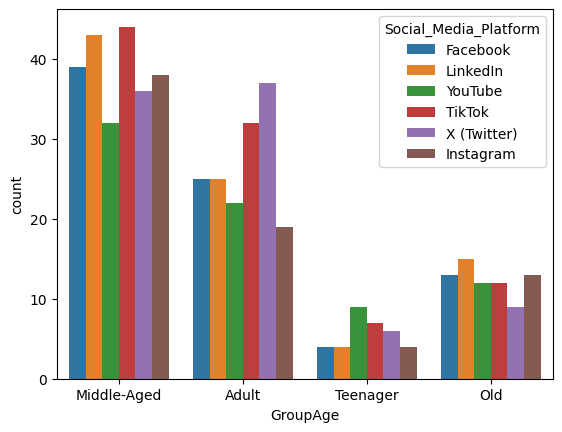

In [41]:
sns.countplot(data=df, x="GroupAge", hue="Social_Media_Platform")


This countplot is not statistically accurate due to the fact that there are more middle aged people in the sample , for making this graph right , we need to normalize all the values according to their propoertion.

<Axes: xlabel='Daily_Screen_Time(hrs)', ylabel='GroupAge'>

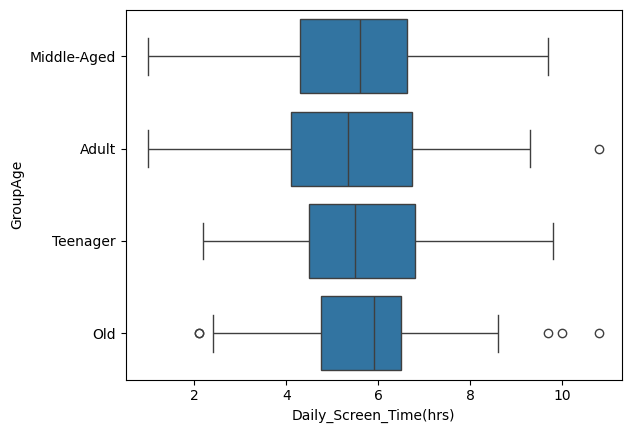

In [45]:
sns.boxplot(x = df["Daily_Screen_Time(hrs)"] , y = df["GroupAge"])

Looking at this , we can see the spread for each age group according to their daily screen time , the medians among all the age groups can be considered almost the same , however , we can takeout some general insights from this:
1. Old aged people have more outliers among them
2. Adults have more varied inter-quartile range suggesting the variance in their daily screen time

<Axes: xlabel='Stress_Level(1-10)', ylabel='GroupAge'>

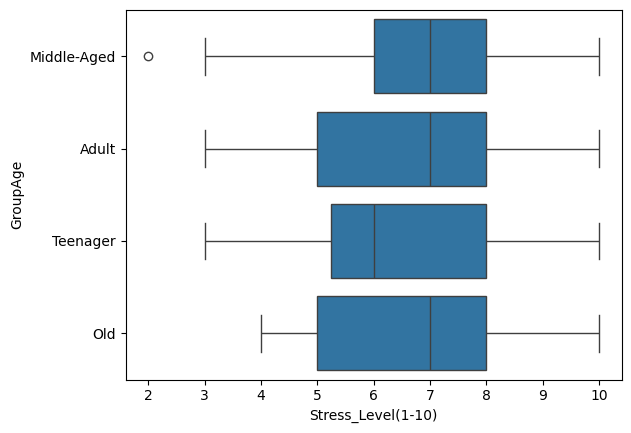

In [66]:
sns.boxplot(x = df["Stress_Level(1-10)"] , y = df["GroupAge"])

The median stress level of each age group has been represented in the above graphs:
1. Old people have a higher median stress level as well as a higher spread , indicating a higher stress among them
2. Middle aged and adults almost have the same median stress , but adults do have a larger spread 
3. Teenagers have an overall lower stress level compared to the other age groups , but the spread is almost same as adults

<Axes: xlabel='Exercise_Frequency(week)', ylabel='GroupAge'>

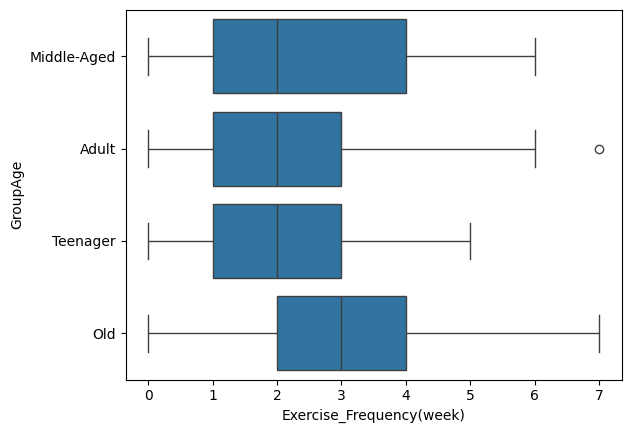

In [67]:
sns.boxplot(x = df["Exercise_Frequency(week)"] , y = df["GroupAge"])

<Axes: xlabel='Sleep_Quality(1-10)', ylabel='GroupAge'>

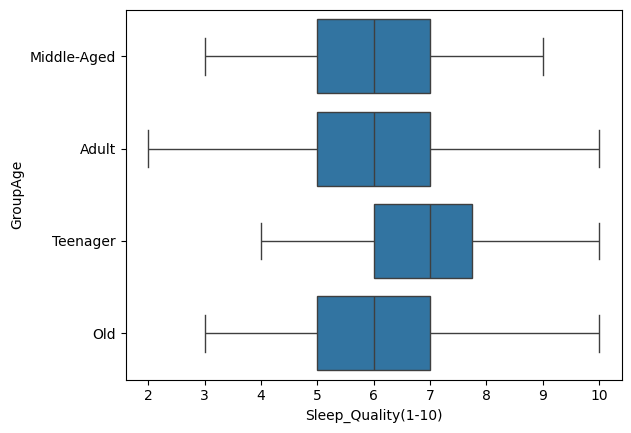

In [68]:
sns.boxplot(x = df["Sleep_Quality(1-10)"] , y = df["GroupAge"])

<Axes: xlabel='GroupAge'>

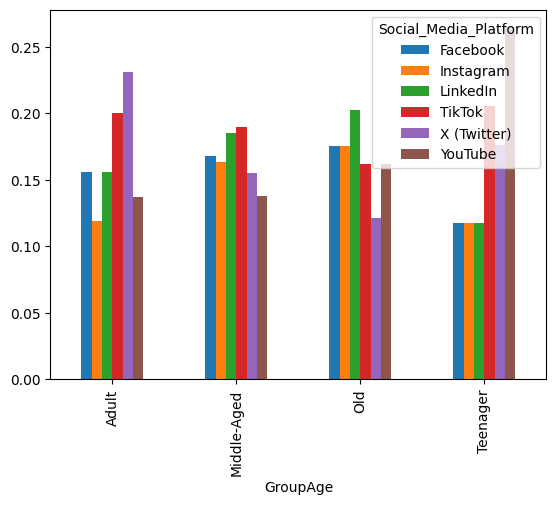

In [65]:
pd.crosstab(df['GroupAge'], df['Social_Media_Platform'], normalize='index').plot(kind='bar')


This is a more group-based percentage distribution according to each age group as we implemented the crosstab function which is essentially groupby funtion mixed with unstack and normalization funtion in .apply()
These are the following observations , we observed in the dataset:


Adults and Middle-Aged groups appear to have relatively balanced platform preferences (diversified social media usage). Adults having a bias towards platforms like X.

Teenagers might show stronger relative proportions for TikTok and Instagram, consistent with real-world trends.

Older groups likely lean toward Facebook and LinkedIn, showing more conservative platform choices